In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [136]:
df = pd.read_csv("SMSSpamCollection", sep="\t", header=None)
df.columns = ["label", "sms_message"]
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [137]:
df2 = df

In [138]:
lbl = LabelEncoder()
df["label"] = lbl.fit_transform(df["label"])

In [139]:
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## remove the punctuation

In [140]:
def remove_punctuation(text):
    import string
    return text.translate(str.maketrans("", "", string.punctuation))

In [141]:
df["sms_message"] = df["sms_message"].apply(remove_punctuation)

In [142]:
df["sms_message"] = df["sms_message"].str.lower()

# remove stop words

In [143]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [144]:
stop_words = stopwords.words("english")
def remove_stopwords(text):
    words = word_tokenize(text)
    return " ".join([word for word in words if word not in stop_words])

In [145]:
df["sms_message"] = df["sms_message"].apply(remove_stopwords)

## apply stemming

In [146]:
from nltk.stem import PorterStemmer

In [147]:
def apply_stemmer(text):
    ps = PorterStemmer()
    words = word_tokenize(text)
    return " ".join([ps.stem(word) for word in words])

In [148]:
df["sms_message"] = df["sms_message"].apply(apply_stemmer)

In [149]:
df.head()

,label,sms_message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


In [150]:
sent = "Hello friends welcome to python programming"

In [151]:
# import lancester stemmer
from nltk.stem import LancasterStemmer
ls = LancasterStemmer()

In [152]:
import string
stopwords = stopwords.words("english")
def clean_text(text):
    token1 = word_tokenize(text)
    token2 = [x.lower() for x in token1 if x not in string.punctuation]
    token3 = [ls.stem(x) for x in token2 if x not in stopwords]
    return token3

In [153]:
clean_text(sent)

['hello', 'friend', 'welcom', 'python', 'program']

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [155]:
df2["sms_message"].apply(clean_text)

0       [go, jurong, point, craz, avail, bug, n, gre, ...
1                              [ok, lar, jok, wif, u, on]
2       [fre, entr, 2, wkli, comp, win, fa, cup, fin, ...
3             [u, dun, say, earl, hor, u, c, alread, say]
4       [nah, dont, think, goe, usf, liv, around, though]
                              ...                        
5567    [2nd, tim, tri, 2, contact, u, u, £750, pound,...
5568                        [ü, b, go, esplanad, fr, hom]
5569                           [pit, mood, soan, suggest]
5570    [guy, bitch, act, lik, id, interest, buy, some...
5571                                     [rofl, tru, nam]
Name: sms_message, Length: 5572, dtype: object

In [156]:
tfidf = TfidfVectorizer(analyzer=clean_text)
x_vect = tfidf.fit_transform(df2["sms_message"])

In [157]:
x_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [158]:
y = df2["label"]


## Cross validation

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, test_size=0.25, random_state=42,stratify=y)

In [160]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape    

((4179, 7428), (1393, 7428), (4179,), (1393,))

## Build the model

In [161]:
from sklearn.svm import SVC

In [162]:
classifier = SVC(kernel="linear")
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [163]:
y_pred = classifier.predict(x_test) 

In [164]:
accuracy_score(y_test, y_pred) 

0.9834888729361091

In [165]:
y_pred_train = classifier.predict(x_train)
accuracy_score(y_train, y_pred_train)

0.9949748743718593

In [166]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1205,    1],
       [  22,  165]])

<Axes: >

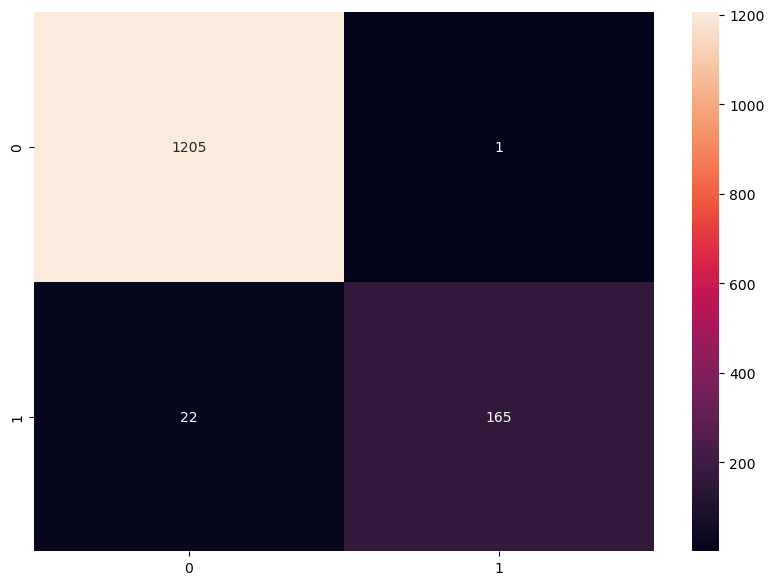

In [167]:
# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")

In [168]:
# build svm with sigmoid kernel
classifier = SVC(kernel="sigmoid")
classifier.fit(x_train, y_train)


SVC(kernel='sigmoid')

In [169]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9806173725771715

In [170]:
confusion_matrix(y_test, y_pred)


array([[1204,    2],
       [  25,  162]])

In [171]:
# predict on sample.csv

df3 = pd.read_csv("sample.csv",sep="/t",header=None)
df3.head()

/tmp/ipykernel_57488/104947020.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df3 = pd.read_csv("sample.csv",sep="/t",header=None)


,0
0,Ok lar i double check wif da hair dresser alre...
1,"As a valued customer, I am pleased to advise y..."
2,"""Today is """"song dedicated day.."""" Which song ..."


In [175]:
x_vect_1 = tfidf.transform(df3[0])
x_vect_1.toarray().shape

(3, 7428)

In [176]:
x_vect.shape

(3, 7428)

In [177]:
y_pred = classifier.predict(x_vect_1)

In [178]:
y_pred

array([0, 1, 0])

In [181]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

wnl = WordNetLemmatizer()
token1 = word_tokenize(sent)
token2 = [x.lower() for x in token1 if x not in string.punctuation]
token3 = [wnl.lemmatize(x) for x in token2 if x not in stopwords]
tokens4 = []
tags = pos_tag(token3)
for word in tags:
    if word[1].startswith("V"):
        tokens4.append(wnl.lemmatize(word[0], pos="v"))
    if word[1].startswith("J"):
        tokens4.append(wnl.lemmatize(word[0], pos="a"))
    if word[1].startswith("R"):
        tokens4.append(wnl.lemmatize(word[0], pos="r"))
    if word[1].startswith("N"):
        tokens4.append(wnl.lemmatize(word[0], pos="n"))